Jag måste säga att jag inte har riktig koll än men det kommer. Jag har fått hjälp av min polare Jakob Bergman med en del kod och ganska mycket förklaringar om hur de olika koncepten fungerar. Jag har fortfarande svårt för att riktigt förstå hur numpy fungerar och hur txt-filen strippas så att det bara blir hanterbar data kvar. (kanske har gjort helt fel...)

Fick "skäll" av mitt minsta barn som undrade varför jag blandat in Pichu och förklarade att det var ologiskt att det var Pichu som var med Pikachu eftersom det är Raichu som faktiskt är Pikachus utveckling. Då stämmer det också med färgerna jag valt (gul=Pikachu - orange=Raichu). Jag förstår att specen till uppgiften inte såg ut så men för att glädja mitt barn ändrade jag.

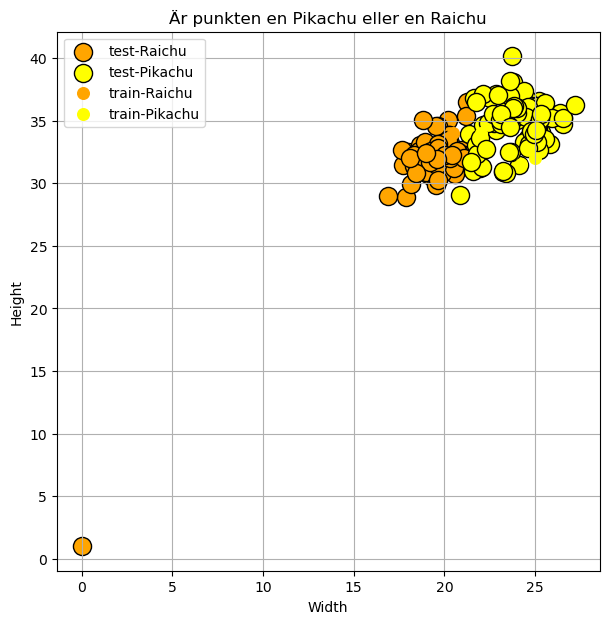

In [2]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

# Grundpunkter (width, height, label)
train_data = [
    (25.0, 32.0, 'Pikachu'),
    (24.2, 31.5, 'Pikachu'),
    (22.0, 34.0, 'Pikachu'),
    (20.5, 34.0, 'Raichu'),
]

# Använd NumPy för att hantera datan
train_coords = np.array([(x, y) for x, y, _ in train_data])
train_labels = np.array([label for _, _, label in train_data])

# Läs testpunkter från fil (datapoints.txt)
test_points = []
fp = 'datapoints.txt'
if os.path.exists(fp):
    with open(fp, 'r', encoding='utf-8') as f:
        for line in f:
            s = line.strip()
            if not s:
                continue
            nums = re.findall(r'[-+]?\d*\.\d+|\d+', s)
            if len(nums) >= 2:
                test_points.append((float(nums[0]), float(nums[1])))
            else:
                print("Kan inte tolka raden i datapoints.txt:", s)

# Klassificering med numpy
def classify_point(x, y, k=1):
    point = np.array([x, y])
    distances = np.linalg.norm(train_coords - point, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_indices]
    # Majoritetsröstning
    values, counts = np.unique(nearest_labels, return_counts=True)
    return values[np.argmax(counts)]

# Klassificera testpunkterna
k = 1
test = [(x, y, classify_point(x, y, k=k)) for (x, y) in test_points]

# Plotta punkterna
colors = {'Pikachu': 'yellow', 'Raichu': 'orange'}
plt.figure(figsize=(7, 7))

# Testpunkter
for label in {lbl for _, _, lbl in test}:
    g = [(x, y) for (x, y, l) in test if l == label]
    xs, ys = zip(*g)
    plt.scatter(xs, ys,
                label=f"test-{label}",
                color=colors.get(label, 'gray'),
                edgecolors='black',
                s=170,
                marker='o')

# Träningspunkter
for label in set(train_labels):
    g = train_coords[train_labels == label]
    xs, ys = g[:, 0], g[:, 1]
    plt.scatter(xs, ys,
                label=f"train-{label}",
                color=colors.get(label, 'gray'),
                s=70)

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Är punkten en Pikachu eller en Raichu')
plt.legend()
plt.grid(True)
plt.show()